# Workshop 6
## Carga de datos csv, shape y conversión de datos dataframe a geodataframe
1. Se cargan las librerías que se van a utilizar en el desarrollo del taller.
2. Se obtienen las rutas para cargar los archivos csv: el catálogo de estaciones, el diccionario de departamentos y las evas. De igual forma se carga el archivo *shape* de municipios.
3. Se reproyecta el *shape* de municipios al **ESPG : 9377**
4. Para el shape se renombran las columnas y se modifica la lectura del campo de código municipal y código de departamento para que se lea como *string* y que se mantengan los 5 caracteres.
5. Para el csv de evas también se renombran las columnas para evitar caracteres extraños e igualmente, se modifican las lecturas de los campos de código de departamento y municipio para que se lea como *string* y que se mantengan los 5 caracteres.
6. Para el csv **catálogo de estaciones IDEAM** se estraen los puntos de la columna **Ubicación**, se limpian de paréntesis, se separan en columnas *lat* y *lon* se convierten a *float*. Luego con la función *Point*, funcion acortada *lambda* y la función *GeoDataframe* se convierte a **Geodataframe**, determinando un **EPSG : 4326** a la geometría creada.
7. Se genera el mapa con los puntos de las estaciones con mapa base mediante la función *explore*.
8. Se reproyecta el sistema coordenado de las **estaciones** a un **EPSG : 9377**

In [3]:
#1 Carga de librerías
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as cx
from pathlib import Path
import pandas as pd
from shapely.geometry import Point

In [4]:

# Carga de archivos csv y shp - se imprimen listas de columnas e información de coordenadas del shp
archivos_CSV=r"/notebooks/Datos_Geograficos"
SHP=r"/notebooks/Datos_Geograficos/municipios_colombia"

shp_ruta=SHP+r"/municipios_colombia.shp"
muni_shp = gpd.read_file(shp_ruta)
muni_shp = muni_shp.to_crs(9377)

evas_ruta  = archivos_CSV+"/Evaluaciones_Agropecuarias_Municipales_EVA.csv"
evas = pd.read_csv(evas_ruta, encoding='utf-8')

estaciones_csv=archivos_CSV+"/Catalogo_Estaciones_IDEAM.csv"
estaciones = pd.read_csv(estaciones_csv, encoding='utf-8')

precip_csv = "/notebooks/precipitacion.csv"
precip = pd.read_csv(precip_csv,encoding='utf-8')


print("\nSISTEMA COORDENADO DEL SHP:\n", muni_shp.crs)

print('\n COLUMNAS DE PRECIPITACION\n',precip.columns.tolist())
print('\n COLUMNAS DE ESTACIONES\n',estaciones.columns.tolist())

#print('COLUMNAS DEL SHAPE \n',muni_shp.columns.tolist())
#print('COLUMNAS DEL CATALOGO DE ESTACIONES \n',estaciones.columns.tolist())
#print('COLUMNAS DE ARCHVIOS EVAS \n',evas.columns.tolist())

#print('\nDOS PRIMEROS DATOS ATRIBUTOS SHP\n',muni_shp.head(2))

# Renombra columnas y lectura de códigos de departamento y municipio - Shape 
muni_shp = muni_shp.rename(columns = {"DPTO_CCDGO":"DPTO_COD","MPIO_CCDGO":"MUN_COD","DPTO_CCDGO":"DPTO_COD","MPIO_CNMBR":"MPIO_NOM"}) # se renombran columnas
muni_shp['MUN_COD'] = muni_shp['MUN_COD'].astype(str).str.zfill(5) # leer columna de codigo municipal como texto y mantener los 5 caracteres siempre
muni_shp['DPTO_COD'] = muni_shp['DPTO_COD'].astype(str).str.zfill(5) # leer columna de codigo departamental como texto y mantener los 5 caracteres siempre
#print('COLUMNAS DEL SHAPE RENOMBRADAS\n',muni_shp.columns.tolist())

# Renombra columnas y lectura de códigos de departamento y municipio - csv EVAS 
evas = evas.rename(columns = {"CÓD. \nDEP.":"DPTO_COD","CÓD. MUN.":"MUN_COD","GRUPO \nDE CULTIVO":"GRUPO DE CULTIVO","SUBGRUPO \nDE CULTIVO":"SUBGRUPO DE CULTIVO",\
                       "Área Sembrada\n(ha)":"Área Sembrada (ha)","Área Cosechada\n(ha)":"Área Cosechada (ha)","Producción\n(t)":"Producción (t)",\
                      "Rendimiento\n(t/ha)":"Rendimiento (t/ha)","NOMBRE \nCIENTIFICO":"NOMBRE CIENTIFICO"})
evas['MUN_COD'] = evas ['MUN_COD'].astype(str).str.zfill(5)
evas['DPTO_COD'] = evas ['DPTO_COD'].astype(str).str.zfill(2)
evas["CULTIVO"] = evas["CULTIVO"].astype(str) 

print('\nCOLUMNAS DE EVAS RENOMBRADAS\n',evas.columns.tolist(),'\n')
#print('\n COLUMNAS DE SHP RENOMBRADAS\n',muni_shp.columns.tolist())
#print('\nDOS PRIMEROS DATOS ATRIBUTOS DE CATALOGO DE ESTACIONES\n',estaciones.head(2))

# Obtener las coordenadas de las estaciones y convertir a geometría de punto
estaciones[['lat','lon']] = estaciones['Ubicación'].str.strip("()").str.split(",",expand=True)
estaciones['lat'] = estaciones['lat'].astype(float)
estaciones['lon'] = estaciones['lon'].astype(float)
estaciones["geometry"] = estaciones.apply(lambda row: Point(row["lon"], row["lat"]), axis=1)
estaciones = gpd.GeoDataFrame(estaciones, geometry="geometry")

estaciones = estaciones.set_crs('epsg:4326')
estaciones.explore(width = '70%', height='70%')




SISTEMA COORDENADO DEL SHP:
 EPSG:9377

 COLUMNAS DE PRECIPITACION
 ['CodigoEstacion', 'NombreEstacion', 'Variable', 'Parametro', 'Fecha', 'Unidad', 'Valor', 'NivelAprobacion']

 COLUMNAS DE ESTACIONES
 ['Codigo', 'Nombre', 'Categoria', 'Estado', 'Departamento', 'Municipio', 'Ubicación', 'Altitud', 'Fecha_instalacion', 'Fecha_suspension', 'Corriente']

COLUMNAS DE EVAS RENOMBRADAS
 ['DPTO_COD', 'DEPARTAMENTO', 'MUN_COD', 'MUNICIPIO', 'GRUPO DE CULTIVO', 'SUBGRUPO DE CULTIVO', 'CULTIVO', 'DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO', 'AÑO', 'PERIODO', 'Área Sembrada (ha)', 'Área Cosechada (ha)', 'Producción (t)', 'Rendimiento (t/ha)', 'ESTADO FISICO PRODUCCION', 'NOMBRE CIENTIFICO', 'CICLO DE CULTIVO'] 



In [7]:
# Reproyección de geodataframe de estaciones
estaciones = estaciones.to_crs(9377)
print("\nSISTEMA COORDENADO DE ESTACIONES:\n", estaciones.crs)
print(evas["CULTIVO"].unique())
print(evas.columns)


SISTEMA COORDENADO DE ESTACIONES:
 EPSG:9377
['ACELGA' 'ACHICORIA' 'MALANGA' 'ACHIRA' 'ACHIOTE' 'AGRAZ' 'AGUACATE'
 'AJI' 'AGUAJE' 'AHUYAMA' 'AJO' 'AJONJOLI' 'ALBAHACA' 'ALFALFA'
 'ALCACHOFA' 'ALGARROBO' 'ALGODON' 'AMARANTO' 'ANIS' 'ANON' 'ANTURIO'
 'APIO' 'ARANDANO' 'ARAZA' 'ARRACACHA' 'ARROZ' 'ARVEJA' 'ASAI'
 'ASPARRAGUS' 'ASTROMELIA' 'AVENA' 'BACURI' 'BADEA' 'BANANITO' 'BANANO'
 'BATATA' 'BERENJENA' 'BREVO' 'BORE' 'BOROJO' 'BROCOLI' 'CACAO' 'PLATANO'
 'CADUCIFOLIOS' 'CAFE' 'CAUCHO' 'CAIMO' 'CALABACIN' 'CALABAZA' 'CALENDULA'
 'CANYARANA' 'CAÑA AZUCARERA' 'CAÑA FLECHA' 'CAÑA MIEL' 'CAÑA PANELERA'
 'CARDAMOMO' 'CEBADA' 'CEBOLLA DE BULBO' 'CENTENO' 'CEBOLLA DE RAMA'
 'CEBOLLIN' 'CHACHAFRUTO' 'CHAMBA' 'CHAMPIÑON' 'CHIA' 'CIMARRON'
 'CHIRIMOYA' 'CHOLUPA' 'CIRUELA' 'CHONQUE' 'CHONTADURO' 'CITRICOS'
 'CILANTRO' 'CLAVEL' 'COCCULUS' 'COCO' 'COCONA' 'COL' 'CURUBA' 'COLIFLOR'
 'COPOAZU' 'CORDELINE CINTA' 'COROZO' 'CURCUMA' 'DATIL' 'DURAZNO' 'ENELDO'
 'ESPARRAGO' 'ESPARTO' 'ESPINACA' 'ESTROPAJO

# OPERACIONES ESPACIALES
Crear un *subset* sobre los municipios filtrando por **BOGOTÁ**:
1. Se Convierten todos los nombres de municipios a mayúscula y se filtra con *str.contains("BOGOTÁ")* para hacer el subset
2. Se grafican los resultados del subset mostrando la cantidad de estaciones del IDEAM que están dentro del municipio

Estaciones dentro de Bogotá        Codigo                          Nombre            Categoria  Estado  \
92   21206920   VILLA TERESA - AUT [21206920]  Climática Principal  Activa   
124  21206960  IDEAM BOGOTA  - AUT [21206960]  Climática Principal  Activa   

    Departamento    Municipio            Ubicación  Altitud Fecha_instalacion  \
92        Bogotá  Bogota, D.C       (4.35, -74.15)     3624        2005-07-19   
124       Bogotá  Bogota, D.C  (4.6, -74.06666667)     2646  2005-04-10 19:00   

    Fecha_suspension  Corriente   lat        lon  \
92               NaN  Guatiquia  4.35 -74.150000   
124              NaN          0  4.60 -74.066667   

                            geometry  
92   POINT (4872442.502 2038769.201)  
124   POINT (4881727.039 2066383.54)  


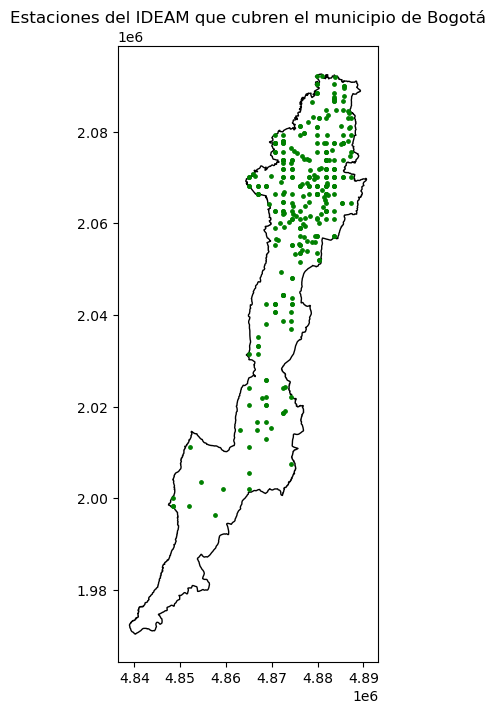

In [6]:
bogota_muni = muni_shp[muni_shp["MPIO_NOM"].str.upper().str.contains("BOGOTÁ")].copy()

bta_stations_bool = estaciones.intersects(bogota_muni.geometry.iloc[0])

bogota_stations = estaciones[bta_stations_bool]
print('Estaciones dentro de Bogotá\n\n',bogota_stations.head(2))

ax = bogota_muni.plot(color="none", edgecolor="black", figsize=(8, 8))
bogota_stations.plot(ax=ax, color="green", markersize=6)
plt.title("Estaciones del IDEAM que cubren el municipio de Bogotá")
plt.show()

### Otras relaciones topologicas
1. Usar *disjoint* para buscar todos los que no están en el municipio definido.
2. Graficar los resultados


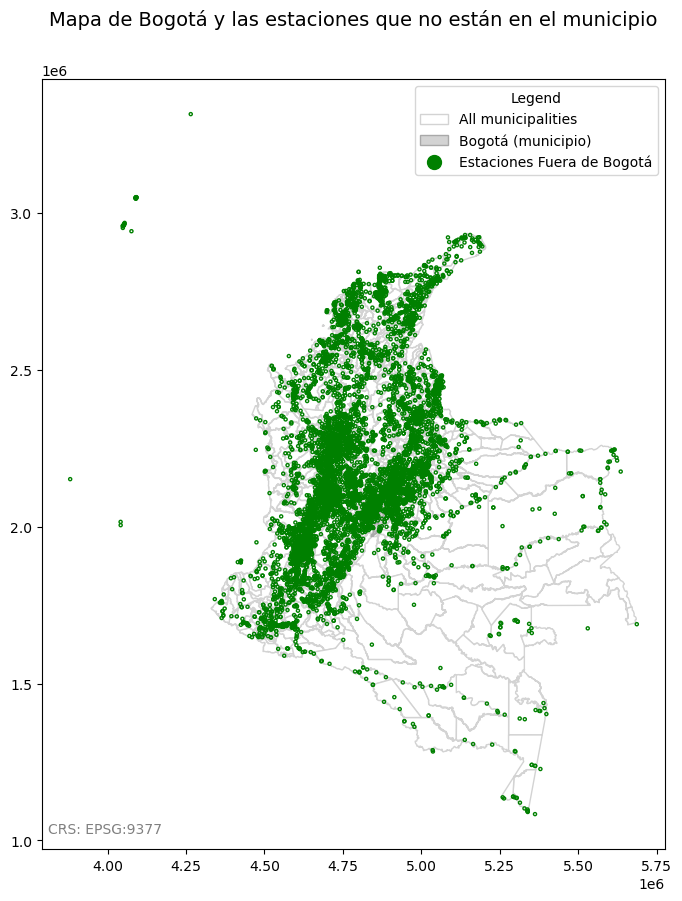

In [11]:
bta_bound = muni_shp[muni_shp["MPIO_NOM"].str.upper().str.contains("BOGOTÁ")].copy()

no_bta_bool_disjoint = estaciones.disjoint(bta_bound.geometry.iloc[0])
no_bta_disjoint = estaciones[no_bta_bool_disjoint]

import matplotlib.patches as mpatches
import matplotlib.lines as mlines

fig, ax = plt.subplots(figsize=(10, 10))

# 1. Base layer: all municipalities
muni_shp.plot(
    ax=ax,
    color='white',
    edgecolor='lightgrey'
)
# 2. Highlight Cumaribo municipality
bta_bound.plot(
    ax=ax,
    color='lightgrey',
    edgecolor='darkgrey'
)
# 3. Plot stations not in Cumaribo
no_bta_disjoint.plot(
    ax=ax,
    color='None',
    edgecolor='green',
    marker='o',
    markersize=5
)
# 4. Title
ax.set_title(
    "Mapa de Bogotá y las estaciones que no están en el municipio\n",
    fontsize=14,
    pad=12
)

# 5. Create proxy artists for the legend
#    - Patch for “All municipalities” (white fill, lightgrey edge)
patch_allmun = mpatches.Patch(
    facecolor='white',
    edgecolor='lightgrey',
    label='All municipalities'
)

#    - Patch for “Cumaribo” (lightgrey fill, darkgrey edge)
patch_bogota = mpatches.Patch(
    facecolor='lightgrey',
    edgecolor='darkgrey',
    label='Bogotá (municipio)'
)

#    - Line2D for “Stations outside Cumaribo” (red circle marker)
marker_stations = mlines.Line2D(
    [], [], 
    color='green',   # edgecolor of the marker
    marker='o',
    linestyle='None',
    markersize=10,
    label='Estaciones Fuera de Bogotá'
)

# 6. Add the legend using those proxy handles
ax.legend(
    handles=[patch_allmun, patch_bogota, marker_stations],
    loc='upper right',
    title='Legend',
    frameon=True
)

# 7. Annotate CRS info in the bottom-left corner
crs_text = f"CRS: {muni_shp.crs.to_string()}"
ax.text(
    0.01, 0.02, crs_text,
    transform=ax.transAxes,
    fontsize=10,
    color='grey',
    bbox=dict(facecolor='white', edgecolor='none', alpha=0.6, pad=2)
)

plt.show()

## Ejercicio 1  
1. Dissolve de los municipios que componen un departamento
2. Subset de las estaciones que se **intersectan** con el departamento
3. Muestre una tabla donde se evidencie el ID y el nombre de las estaciones seleccionadas
4. Crear un mapa donde se muestren los límites del departamento seleccionado y las estaciones que se intersectan en un color que contraste

Codigo de departamento para Atlántico

 466    00008
Name: DPTO_COD, dtype: object
          Codigo                                       Nombre
231     29035200                     REPELON - AUT [29035200]
237     29047070                 SAN PEDRITO - AUT [29047070]
248     29045000                 SABANALARGA - AUT [29045000]
255     29047000                     TEBSA BQUILLA [29047000]
414     29040080                         POLONUEVO [29040080]
428     29045110                    JUAN DE ACOSTA [29045110]
429     29040400                    JUAN DE ACOSTA [29040400]
496     29045190     AEROPUERTO E. CORTISSOZ - AUT [29045190]
507     14010100                        PINTADA LA [14010100]
508     29047080                DARCENA BARRANQUIL [29047080]
512     29040450                 BARRANQUILLA SEDE [29040450]
516     29045100                        BASE NAVAL [29045100]
586     29045120                        FLORES LAS [29045120]
1935  2904500130  RADIO SONDA BARRANQUILLA - AUT 

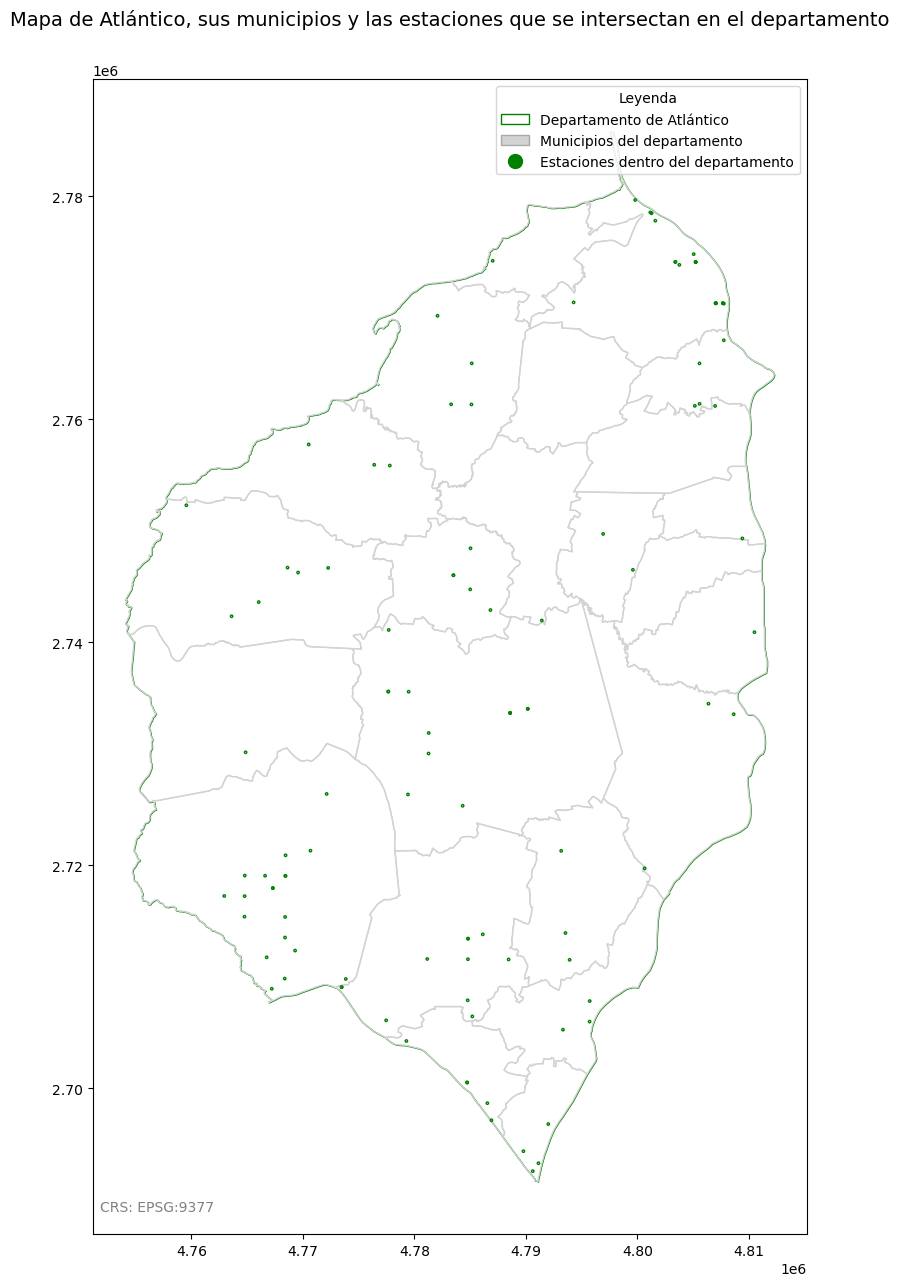

In [40]:
cod_mun_barr = muni_shp[muni_shp['MPIO_NOM'].str.upper().str.contains('BARRANQUILLA')].copy()
cod_dep_atl = cod_mun_barr['DPTO_COD']
print('Codigo de departamento para Atlántico\n\n',cod_dep_atl)

mu_atl_bounds = muni_shp[muni_shp['DPTO_COD'].str.contains('00008')].copy()
atl_bounds_dissolve = mu_atl_bounds.dissolve('DPTO_COD')

atl_estaciones_bool = estaciones.intersects(atl_bounds_dissolve.geometry.iloc[0])
atl_estaciones = estaciones[atl_estaciones_bool]

print(atl_estaciones[['Codigo','Nombre']].head(15))

fig, ax = plt.subplots(figsize=(10, 15))

# 1. Base layer: depto Atlántico
atl_bounds_dissolve.plot(
    ax=ax,
    color='white',
    edgecolor='green'
)
# 2. Highlight Atlántico municipality
mu_atl_bounds.plot(
    ax=ax,
    color='none',
    edgecolor='lightgrey'
)
# 3. Plot stations 
atl_estaciones.plot(
    ax=ax,
    color='None',
    edgecolor='green',
    marker='o',
    markersize=3
)
# 4. Title
ax.set_title(
    "Mapa de Atlántico, sus municipios y las estaciones que se intersectan en el departamento\n",
    fontsize=14,
    pad=12
)

# 5. Create proxy artists for the legend
#    - Patch for “All municipalities” (white fill, lightgrey edge)
patch_allmun = mpatches.Patch(
    facecolor='white',
    edgecolor='green',
    label='Departamento de Atlántico'
)

#    - Patch for “Cumaribo” (lightgrey fill, darkgrey edge)
patch_atlantico = mpatches.Patch(
    facecolor='lightgrey',
    edgecolor='darkgrey',
    label='Municipios del departamento'
)

#    - Line2D for “Stations outside Cumaribo” (red circle marker)
marker_stations = mlines.Line2D(
    [], [], 
    color='green',   # edgecolor of the marker
    marker='o',
    linestyle='None',
    markersize=10,
    label='Estaciones dentro del departamento'
)

# 6. Add the legend using those proxy handles
ax.legend(
    handles=[patch_allmun, patch_atlantico, marker_stations],
    loc='upper right',
    title='Leyenda',
    frameon=True
)

# 7. Annotate CRS info in the bottom-left corner
crs_text = f"CRS: {muni_shp.crs.to_string()}"
ax.text(
    0.01, 0.02, crs_text,
    transform=ax.transAxes,
    fontsize=10,
    color='grey',
    bbox=dict(facecolor='white', edgecolor='none', alpha=0.6, pad=2)
)

plt.show()


## Ejercicio 2
1. Identificar las estaciones que están a 20km de bogotá
2. Listar las estaciones con su ID y altura
3. Mostrar en mapa las estaciones

Codigo departamento Cundinamarca : 
 [761    00025
Name: DPTO_COD, dtype: object]
        Codigo                                  Nombre  Altitud
78    21195170                PAQUILO - AUT [21195170]     2957
91    21195190                  PASCA - AUT [21195190]     2256
107   21206990              TIBAITATA - AUT [21206990]     2543
112   21206980  SANTA CRUZ DE SIECHA  - AUT [21206980]     3100
113   21206940               CIUDAD BOLIVAR [21206940]     2687
114   35025080           PNN CHINGAZA - AUT [35025080]     3205
350   35025090    BOSQUE INTERVENIDO  - AUT [35025090]     2944
381   21206450                    TERMOZIPA [21206450]     2497
520   21205910             LA COSECHA - AUT [21205910]     2600
1086  21201310           PREVENTORIO INFANT [21201310]     2650
1182  21160200            CONC L BUSTAMANTE [21160200]     1613
1191  35027500       QUEBRADA RINCON  - AUT [35027500]     2943
1255  21190330                        NUNEZ [21190330]     1950
1271  21195110        

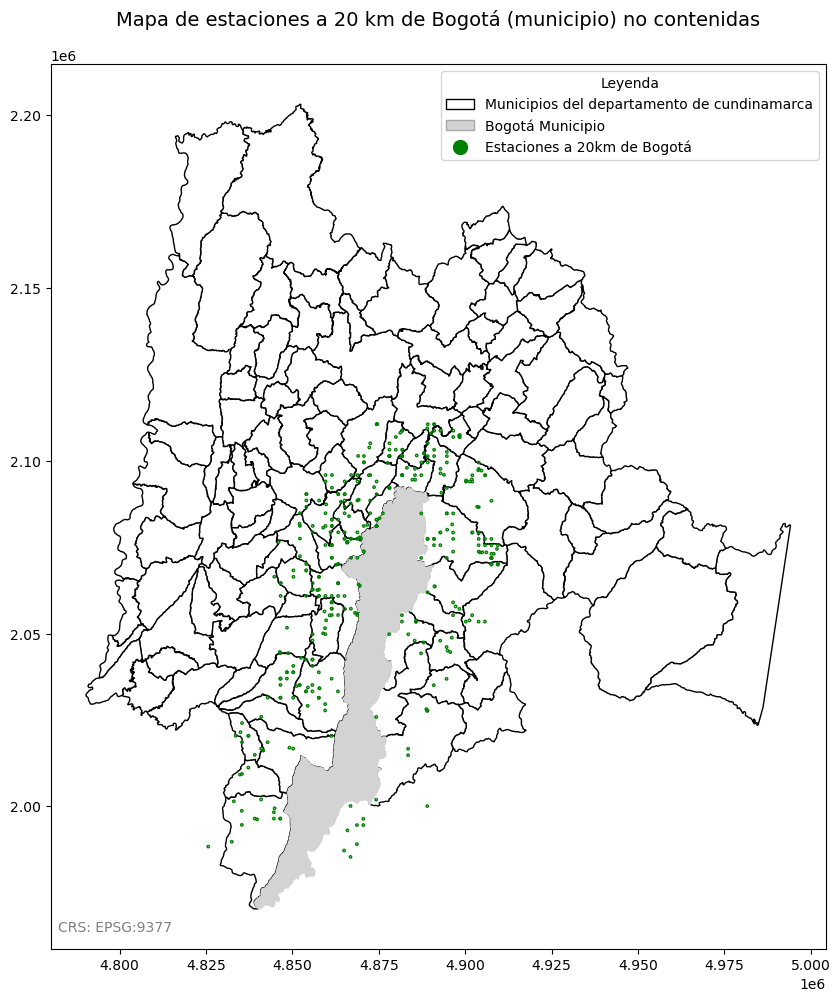

In [52]:
bta_bound = muni_shp[muni_shp["MPIO_NOM"].str.upper().str.contains("BOGOTÁ")].copy()
anap_bound = muni_shp[muni_shp["MPIO_NOM"].str.upper().str.contains("ANAPOIMA")].copy()
bta_bufer_20km = bta_bound.buffer(20_000)

bta_20km_estaciones_bool = estaciones.intersects(bta_bufer_20km.geometry.iloc[0])
bta_20km_estaciones = estaciones[bta_20km_estaciones_bool]

bta_20km_est_bool = bta_20km_estaciones.disjoint(bta_bound.geometry.iloc[0])
bta_20km_est = bta_20km_estaciones[bta_20km_est_bool]

cod_dep_cund = [anap_bound['DPTO_COD']]

print('Codigo departamento Cundinamarca : \n',cod_dep_cund)
mun_cund_bounds = muni_shp[muni_shp["DPTO_COD"].str.contains("00025")].copy()



print(bta_20km_est[['Codigo','Nombre','Altitud']].head(15))

fig, ax = plt.subplots(figsize=(10, 15))

# 1. Base layer: municipios cundinamarca
mun_cund_bounds.plot(
    ax=ax,
    color='white',
    edgecolor='black'
)
# 2. Highlight Atlántico municipality
bta_bound.plot(
    ax=ax,
    color='lightgrey',
    edgecolor='lightgrey'
)
# 3. Plot stations 
bta_20km_est.plot(
    ax=ax,
    color='None',
    edgecolor='green',
    marker='o',
    markersize=3
)
# 4. Title
ax.set_title(
    "Mapa de estaciones a 20 km de Bogotá (municipio) no contenidas\n",
    fontsize=14,
    pad=12
)

# 5. Create proxy artists for the legend
#    - Patch for “All municipalities” (white fill, lightgrey edge)
patch_allmun = mpatches.Patch(
    facecolor='white',
    edgecolor='black',
    label='Municipios del departamento de cundinamarca'
)

#    - Patch for “Bogota” (lightgrey fill, darkgrey edge)
patch_bogota = mpatches.Patch(
    facecolor='lightgrey',
    edgecolor='darkgrey',
    label='Bogotá Municipio'
)

#    - Line2D for “Stations” (green circle marker)
marker_stations = mlines.Line2D(
    [], [], 
    color='green',   # edgecolor of the marker
    marker='o',
    linestyle='None',
    markersize=10,
    label='Estaciones a 20km de Bogotá '
)

# 6. Add the legend using those proxy handles
ax.legend(
    handles=[patch_allmun, patch_bogota, marker_stations],
    loc='upper right',
    title='Leyenda',
    frameon=True
)

# 7. Annotate CRS info in the bottom-left corner
crs_text = f"CRS: {muni_shp.crs.to_string()}"
ax.text(
    0.01, 0.02, crs_text,
    transform=ax.transAxes,
    fontsize=10,
    color='grey',
    bbox=dict(facecolor='white', edgecolor='none', alpha=0.6, pad=2)
)

plt.show()